# Business Understanding

Penyakit ginjal kronik (PGK) merupakan masalah kesehatan global yang serius dengan dampak signifikan pada individu, keluarga, dan sistem perawatan kesehatan. Di Indonesia, prevalensi PGK terus meningkat, dengan perkiraan mencapai 2,0% permil pada tahun 2013 dan 3,8% permil pada tahun 2018. Hal ini menjadikan PGK sebagai salah satu masalah kesehatan utama yang perlu diprioritaskan.

Proyek ini memiliki potensi untuk memberikan wawasan berharga yang dapat membantu meningkatkan pencegahan, diagnosis, pengobatan, dan pengelolaan penyakit ini. Dengan memanfaatkan kekuatan data dan analitik, kita dapat:

1. Memahami faktor risiko PGK: Mengidentifikasi individu yang berisiko tinggi terkena PGK, memungkinkan intervensi pencegahan dini.
2. Meningkatkan diagnosis dini: Mengembangkan algoritma pembelajaran mesin untuk mendeteksi PGK secara akurat dan dini, meningkatkan peluang pengobatan yang sukses.
3. Memandu pengobatan yang dipersonalisasi: Mengembangkan rencana perawatan yang disesuaikan dengan kebutuhan individu setiap pasien, meningkatkan hasil pengobatan.
4. Memantau perkembangan penyakit: Memprediksi risiko komplikasi dan eksaserbasi, memungkinkan intervensi tepat waktu untuk mencegah kemunduran kesehatan.
5. Mengoptimalkan penggunaan sumber daya: Mengidentifikasi area inefisiensi dalam sistem perawatan kesehatan dan mengalokasikan sumber daya secara lebih efektif.

Tujuan Proyek

Proyek ini bertujuan untuk:

1. Mengembangkan model prediktif untuk memprediksi risiko terkena PGK: Model ini akan membantu mengidentifikasi individu yang berisiko tinggi terkena PGK, memungkinkan intervensi pencegahan dini.
2. Membuat alat skrining untuk mendeteksi PGK secara dini: Alat ini akan memungkinkan deteksi PGK secara akurat dan dini, meningkatkan peluang pengobatan yang sukses.
3. Mengembangkan model untuk memprediksi hasil pengobatan: Model ini akan membantu dokter memilih rencana perawatan yang paling efektif untuk setiap pasien, meningkatkan hasil pengobatan.
4. Membuat sistem untuk memantau perkembangan penyakit: Sistem ini akan memungkinkan dokter untuk memantau perkembangan penyakit setiap pasien dan melakukan intervensi tepat waktu untuk mencegah komplikasi.
5. Menganalisis data perawatan kesehatan untuk mengidentifikasi area inefisiensi: Analisis ini akan membantu mengoptimalkan penggunaan sumber daya dalam sistem perawatan kesehatan.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Data Understanding

Pada tahapan ini, peneliti akan mengumpulkan datanya terlebih dahulu dan melakukan pembacaan data. Data yang didapat bersumber dari kaggle.com dan dilakukan pembacaan dengan pandas.

In [2]:
df = pd.read_csv("penyakit_ginjal_kronik.csv")
df.head()

,id,umur,tekanandarah,gravitas,albumin,sugar,seldarahmerah,pussel,puscell,bakteri,...,MCV,seldarahputih,seldarahmerah.1,hipertensi,diabetes,cad,nafsumakan,edema,anemia,klasifikasi
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
print(f"Jumlah data terdiri dari {df.shape[0]} data dengan {df.shape[1]} kolom atau variabel")

Jumlah data terdiri dari 400 data dengan 26 kolom atau variabel


# Data Preparation

Pada tahapan ini akan dilakukan pra-pemrosesan data yang terdiri dari:
1. Pembersihan Data: Mengatasi missing values atau nilai kosong, dan data inkonsistensi.
2. Analisis Data: Menganalisis data untuk mendapatkan insights yang signifikan.
3. Seleksi Fitur: Melakukan seleksi fitur atau variabel terhadap data yaitu menghapus beberapa fitur atau variabel untuk mempercepat komputasi pembuatan metode dan meningkatkan performa metode.
4. Transformasi Data: Melakukan transformasi data yaitu mengubah data kategori menjadi data numerik agar dapat diproses menggunakan metode uncertainty factor dan mengubah skala antar data numerik menjadi sama.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               400 non-null    int64  
 1   umur             391 non-null    float64
 2   tekanandarah     388 non-null    float64
 3   gravitas         353 non-null    float64
 4   albumin          354 non-null    float64
 5   sugar            351 non-null    float64
 6   seldarahmerah    248 non-null    object 
 7   pussel           335 non-null    object 
 8   puscell          396 non-null    object 
 9   bakteri          396 non-null    object 
 10  gds              356 non-null    float64
 11  ureum            381 non-null    float64
 12  kreatinin        383 non-null    float64
 13  natrium          313 non-null    float64
 14  kalium           312 non-null    float64
 15  hemoglobin       348 non-null    float64
 16  MCV              330 non-null    object 
 17  seldarahputih   

In [5]:
# Menghapus data id karna data id tidak akan digunakan dalam pembuatan metode uncertainty maupun pada analisis.
df.drop("id", axis=1, inplace=True)

for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = df[i].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   umur             391 non-null    float64 
 1   tekanandarah     388 non-null    float64 
 2   gravitas         353 non-null    float64 
 3   albumin          354 non-null    float64 
 4   sugar            351 non-null    float64 
 5   seldarahmerah    248 non-null    category
 6   pussel           335 non-null    category
 7   puscell          396 non-null    category
 8   bakteri          396 non-null    category
 9   gds              356 non-null    float64 
 10  ureum            381 non-null    float64 
 11  kreatinin        383 non-null    float64 
 12  natrium          313 non-null    float64 
 13  kalium           312 non-null    float64 
 14  hemoglobin       348 non-null    float64 
 15  MCV              330 non-null    category
 16  seldarahputih    295 non-null    category
 1

In [6]:
df.isnull().sum()

umur                 9
tekanandarah        12
gravitas            47
albumin             46
sugar               49
seldarahmerah      152
pussel              65
puscell              4
bakteri              4
gds                 44
ureum               19
kreatinin           17
natrium             87
kalium              88
hemoglobin          52
MCV                 70
seldarahputih      105
seldarahmerah.1    130
hipertensi           2
diabetes             2
cad                  2
nafsumakan           1
edema                1
anemia               1
klasifikasi          0
dtype: int64

In [7]:
df.dropna().shape

(158, 25)

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,umur,tekanandarah,gravitas,albumin,sugar,gds,ureum,kreatinin,natrium,kalium,hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [10]:
df.describe(exclude="number").T

,count,unique,top,freq
seldarahmerah,248,2,normal,201
pussel,335,2,normal,259
puscell,396,2,notpresent,354
bakteri,396,2,notpresent,374
MCV,330,44,52,21
seldarahputih,295,92,9800,11
seldarahmerah.1,270,46,5.2,18
hipertensi,398,2,no,251
diabetes,398,5,no,258
cad,398,3,no,362


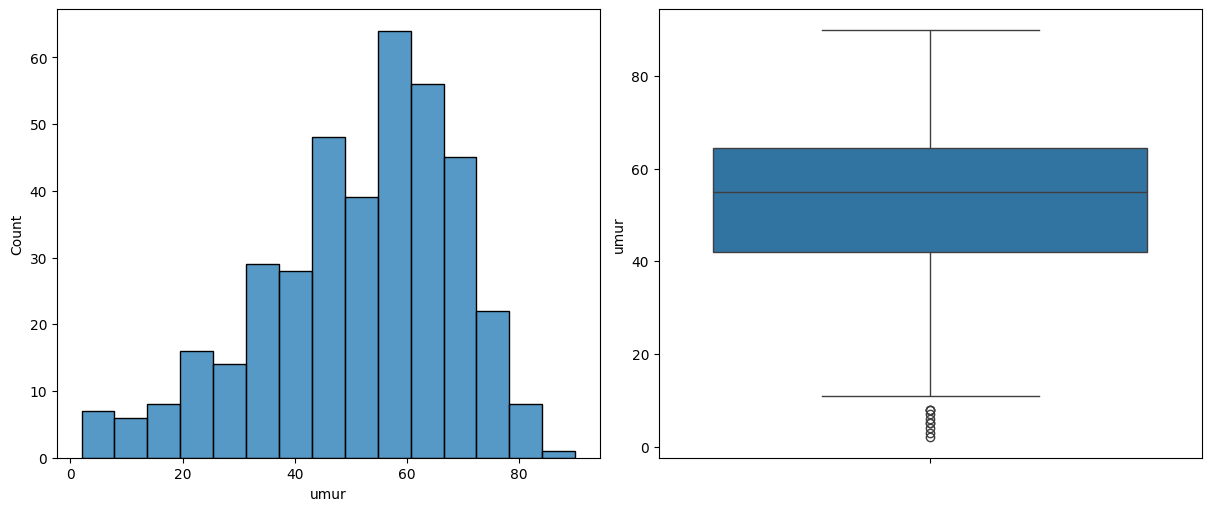

In [11]:
# Analisis Umur
fig, ax = plt.subplots(1, 2, figsize=(12, 5), layout="constrained")
sns.histplot(df["umur"], ax=ax[0])
sns.boxplot(df["umur"], ax=ax[1])
plt.show()

- Penyakit ginjal dapat menyerang seseorang berumur antara 2 - 90 tahun
- Terdapatnya nilai pencilan atau outliers


In [12]:
def detect_outliers(data, name):
    Q1 = df[name].quantile(0.25)
    Q3 = df[name].quantile(0.75)
    IQR = Q3 - Q1
    min_IQR = Q1 - 1.5*IQR
    max_IQR = Q3 + 1.5*IQR
    data1 = data[(data[name] > min_IQR) | (data[name] < max_IQR)]
    
    return data1

In [13]:
print(f"Total Outlier: {len(df) - len(detect_outliers(df, 'umur'))}")

Total Outlier: 9


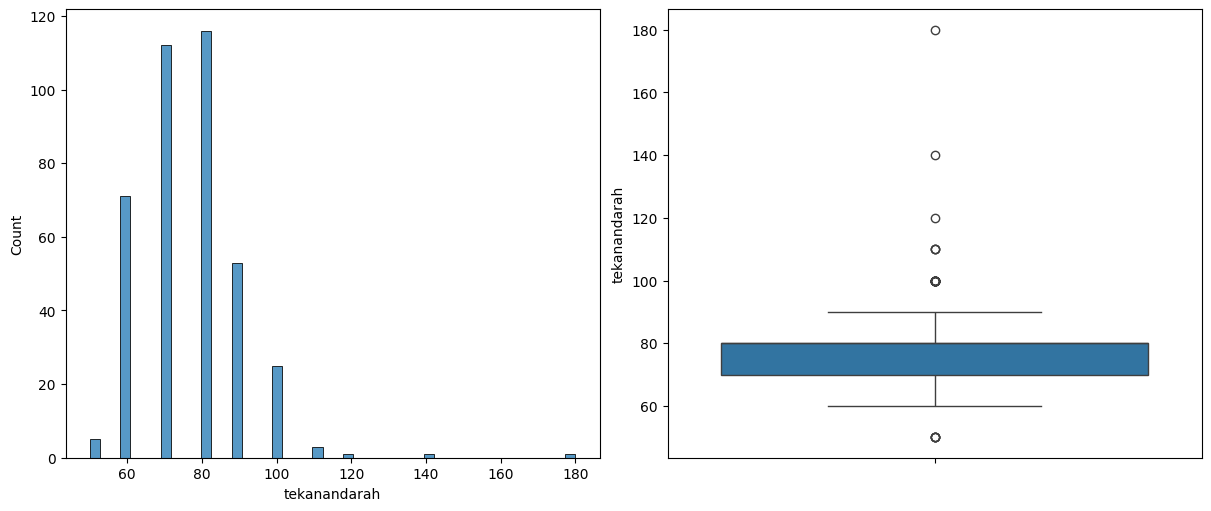

In [14]:
# Analisis Tekanan Darah
fig, ax = plt.subplots(1, 2, figsize=(12, 5), layout="constrained")
sns.histplot(df["tekanandarah"], ax=ax[0])
sns.boxplot(df["tekanandarah"], ax=ax[1])
plt.show()

- Penyakit ginjal lebih sering menyerang seseorang yang memiliki tekanan darah berkisar 60-80 mmHg
- Terdapat beberapa outliers

In [15]:
print(f"Total Outlier: {len(df) - len(detect_outliers(df, 'tekanandarah'))}")

Total Outlier: 12


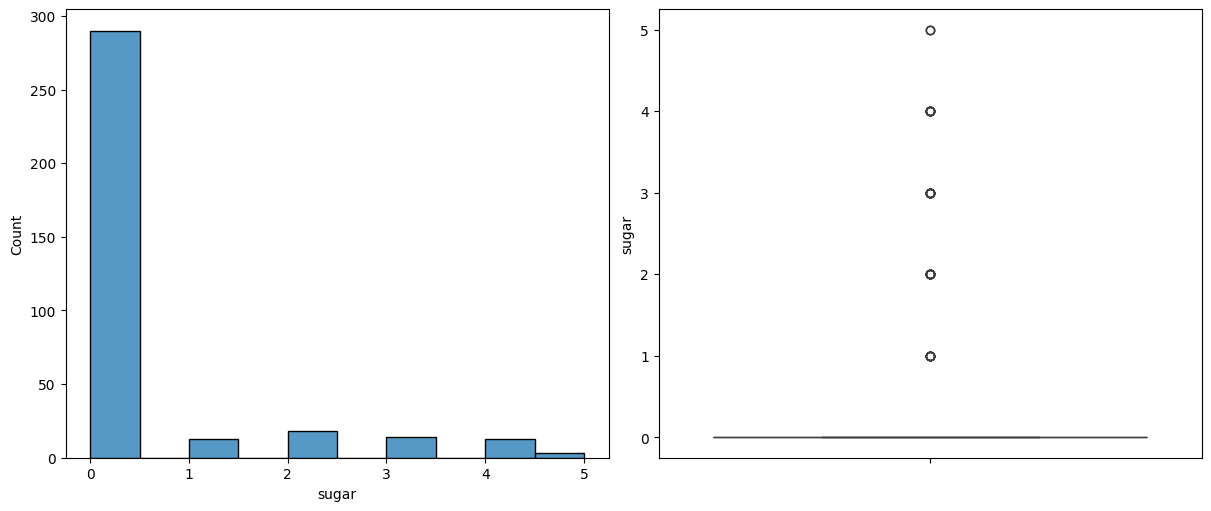

In [16]:
# Analisis Sugar
fig, ax = plt.subplots(1, 2, figsize=(12, 5), layout="constrained")
sns.histplot(df["sugar"], ax=ax[0])
sns.boxplot(df["sugar"], ax=ax[1])
plt.show()

- Terdapatnya data terbanyak adalah 0 yang memungkinkan adanya kesalahan input dalam data pasien
- Peneliti akan menghapus variabel ini karna variabel ini akan memperburuk kinerja model

In [17]:
df.drop("sugar", axis=1, inplace=True)

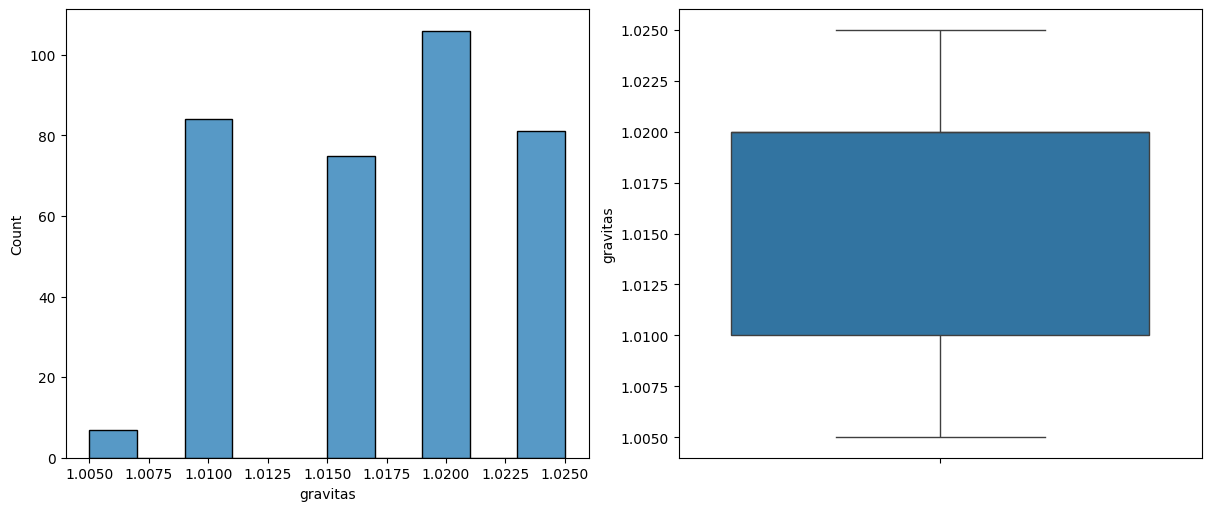

In [18]:
# Analisis gravitas
fig, ax = plt.subplots(1, 2, figsize=(12, 5), layout="constrained")
sns.histplot(df["gravitas"], ax=ax[0])
sns.boxplot(df["gravitas"], ax=ax[1])
plt.show()

- Penyakit ginjal menyerang seseorang yang memiliki gravitas sekitar 1

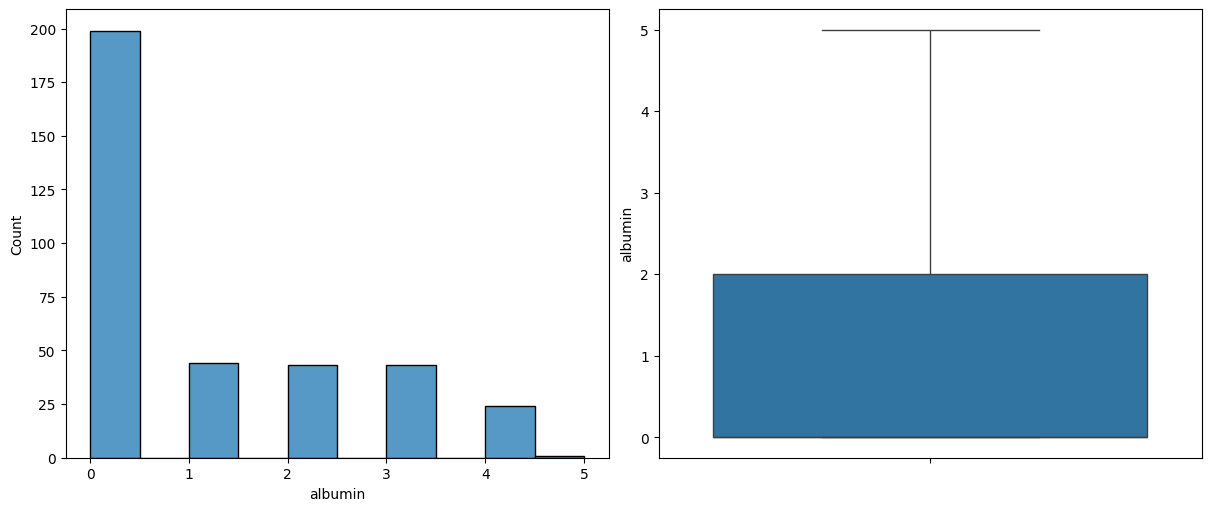

In [19]:
# Analisis albumin
fig, ax = plt.subplots(1, 2, figsize=(12, 5), layout="constrained")
sns.histplot(df["albumin"], ax=ax[0])
sns.boxplot(df["albumin"], ax=ax[1])
plt.show()

- Normalnya, seseorang memiliki kadar albumin serum adalah 3.4 - 5.4 g/dL. Namun, terdapat banyaknya seseorang yang memiliki kadar dibawah itu yang mengindikasikan hipoalbuminemia. 
- Hipoalbuminemia dapat disebabkan oleh beberapa faktor, salah satunya adalah kerusakan ginjal.

In [20]:
df["seldarahputih"].value_counts()

seldarahputih
9800      11
6700      10
9200       9
9600       9
7200       9
          ..
4100       1
4900       1
\t8400     1
5100       1
9900       1
Name: count, Length: 92, dtype: int64

In [21]:
df["MCV"].value_counts()

MCV
52      21
41      21
44      19
48      19
40      16
43      14
45      13
42      13
28      12
50      12
36      12
33      12
32      12
37      11
34      11
29       9
46       9
30       9
35       9
31       8
24       7
39       7
26       6
38       5
51       4
54       4
47       4
53       4
49       4
27       3
22       3
25       3
19       2
23       2
\t43     1
\t?      1
21       1
20       1
18       1
17       1
16       1
15       1
14       1
9        1
Name: count, dtype: int64

In [22]:
df["seldarahputih"].replace(r"\t8400", "8400", inplace=True)
df["seldarahputih"].replace(r"\t?", "0", inplace=True)
df["seldarahputih"].replace(r"\t6200", "6200", inplace=True)
df["seldarahputih"] = pd.to_numeric(df["seldarahputih"], errors="coerce")
df["seldarahputih"].replace(0, df["seldarahputih"].median(), inplace=True)

df["MCV"].replace(r"\t43", "43", inplace=True)
df["MCV"].replace(r"\t", "0", inplace=True)
df["MCV"] = pd.to_numeric(df["MCV"], errors="coerce")
df["MCV"].replace(0, df["MCV"].median(), inplace=True)

C:\Users\danim\AppData\Local\Temp\ipykernel_2080\1000538236.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["seldarahputih"].replace(r"\t8400", "8400", inplace=True)
C:\Users\danim\AppData\Local\Temp\ipykernel_2080\1000538236.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [23]:
df.head()

,umur,tekanandarah,gravitas,albumin,seldarahmerah,pussel,puscell,bakteri,gds,ureum,...,MCV,seldarahputih,seldarahmerah.1,hipertensi,diabetes,cad,nafsumakan,edema,anemia,klasifikasi
0,48.0,80.0,1.020,1.0,NaN,normal,notpresent,notpresent,121.0,36.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,NaN,normal,notpresent,notpresent,NaN,18.0,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,normal,normal,notpresent,notpresent,423.0,53.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,normal,abnormal,present,notpresent,117.0,56.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,normal,normal,notpresent,notpresent,106.0,26.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


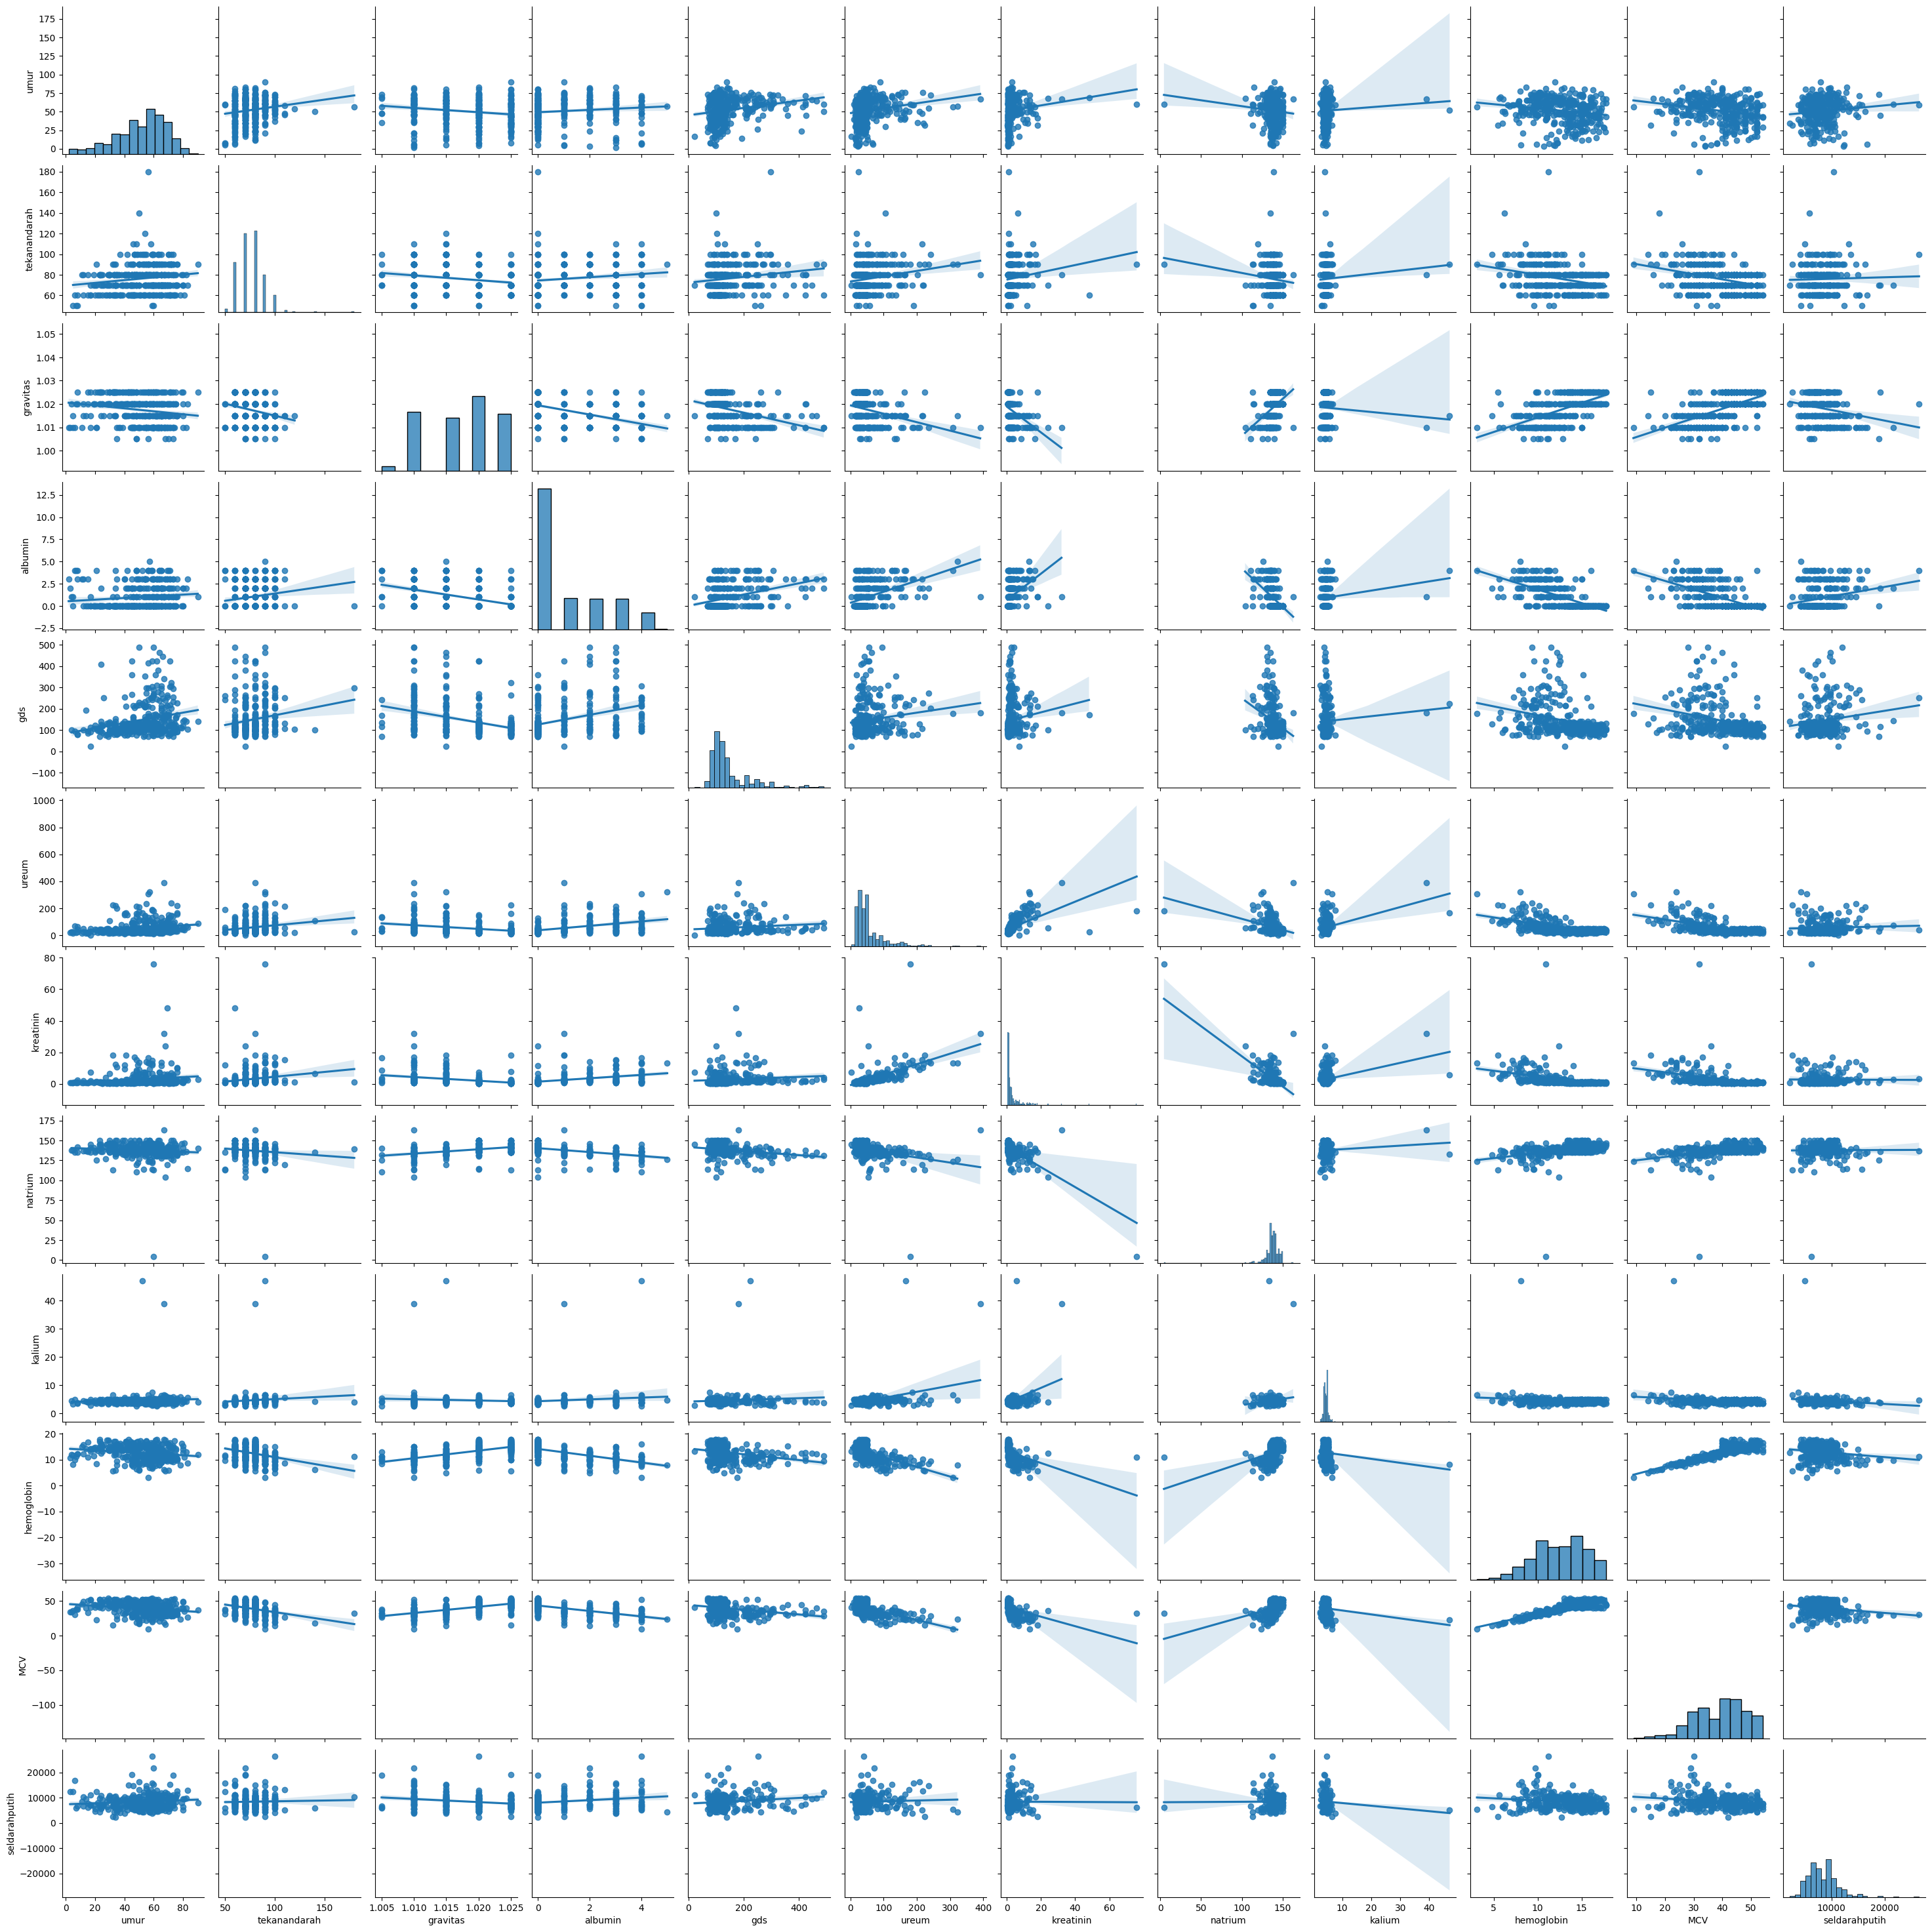

In [24]:
sns.pairplot(df, kind="reg", diag_kind="hist")

- Terdapat banyak variabel yang berkorelasi rendah terhadap variabel lainnya
- Beberapa variabel memiliki korelasi positive maupun negative
- Terdapat beberapa outliers atau nilai pencilan di dalam beberapa variabebl
- Setelah melihat beberapa analisis dan banyaknya outliers, peneliti akan mengatasi missing values dengan nilai mean dan median. Untuk data kategori, peneliti akan mengatasinya dengan nilai modus

In [25]:
df.isnull().sum()

umur                 9
tekanandarah        12
gravitas            47
albumin             46
seldarahmerah      152
pussel              65
puscell              4
bakteri              4
gds                 44
ureum               19
kreatinin           17
natrium             87
kalium              88
hemoglobin          52
MCV                 71
seldarahputih      106
seldarahmerah.1    130
hipertensi           2
diabetes             2
cad                  2
nafsumakan           1
edema                1
anemia               1
klasifikasi          0
dtype: int64

- Hampir semua variabel memiliki nilai kosong atau missing values.
- Nilai kosong atau missing values terbanyak di dalam variabel seldarahmerah

In [26]:
numeric_variables = [i for i in df.columns if df[i].dtypes != "category"]
categoric_variables = [i for i in df.columns if df[i].dtypes == "category"]
df[numeric_variables] = df[numeric_variables].fillna(df[numeric_variables].median())
df[categoric_variables] = df[categoric_variables].fillna(df[categoric_variables].mode().iloc[0])
df.isnull().sum()

umur               0
tekanandarah       0
gravitas           0
albumin            0
seldarahmerah      0
pussel             0
puscell            0
bakteri            0
gds                0
ureum              0
kreatinin          0
natrium            0
kalium             0
hemoglobin         0
MCV                0
seldarahputih      0
seldarahmerah.1    0
hipertensi         0
diabetes           0
cad                0
nafsumakan         0
edema              0
anemia             0
klasifikasi        0
dtype: int64

In [27]:
# 10 data teratas
df.head(10)

,umur,tekanandarah,gravitas,albumin,seldarahmerah,pussel,puscell,bakteri,gds,ureum,...,MCV,seldarahputih,seldarahmerah.1,hipertensi,diabetes,cad,nafsumakan,edema,anemia,klasifikasi
0,48.0,80.0,1.020,1.0,normal,normal,notpresent,notpresent,121.0,36.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,normal,normal,notpresent,notpresent,121.0,18.0,...,38.0,6000.0,5.2,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,normal,normal,notpresent,notpresent,423.0,53.0,...,31.0,7500.0,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,normal,abnormal,present,notpresent,117.0,56.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,normal,normal,notpresent,notpresent,106.0,26.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,normal,normal,notpresent,notpresent,74.0,25.0,...,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,normal,normal,notpresent,notpresent,100.0,54.0,...,36.0,8000.0,5.2,no,no,no,good,no,no,ckd
7,24.0,80.0,1.015,2.0,normal,abnormal,notpresent,notpresent,410.0,31.0,...,44.0,6900.0,5,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,normal,abnormal,present,notpresent,138.0,60.0,...,33.0,9600.0,4,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,abnormal,abnormal,present,notpresent,70.0,107.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd


- Missing values sudah tidak terlihat

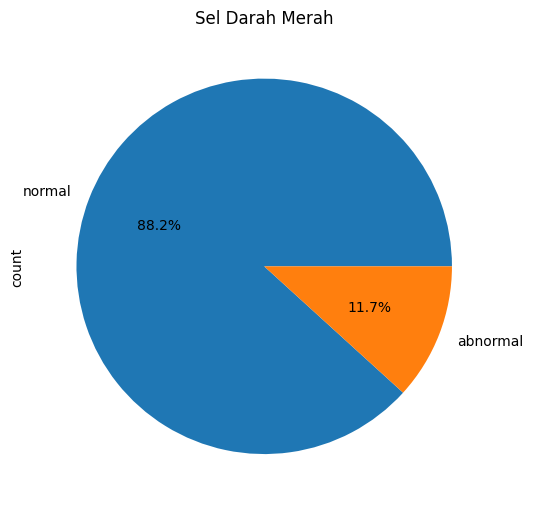

In [28]:
# Sel Darah Merah
fig, ax = plt.subplots(figsize=(7, 5), layout="constrained")
df["seldarahmerah"].value_counts().plot.pie(autopct="%.1f%%", ax=ax)
ax.set_title("Sel Darah Merah")
plt.show()

- Terlihat banyaknya seseorang yang memiliki sel darah merah yang tergolong normal dibanding seseorang yang memiliki sel darah merah yang tergolong abnormal.

C:\Users\danim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


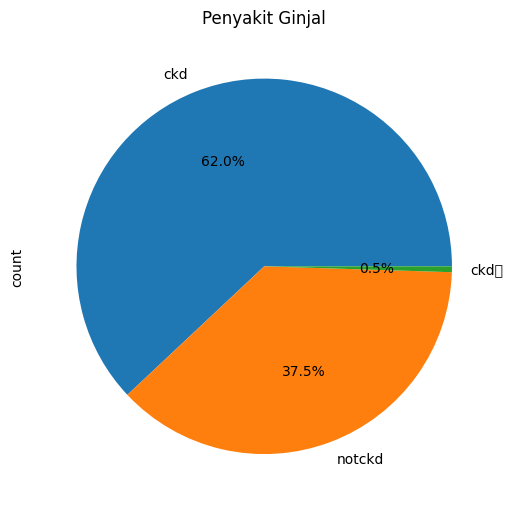

klasifikasi
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [29]:
# Penyakit Ginjal Kronis
fig, ax = plt.subplots(figsize=(7, 5), layout="constrained")
df["klasifikasi"].value_counts().plot.pie(autopct="%.1f%%", ax=ax)
ax.set_title("Penyakit Ginjal")
plt.show()
df["klasifikasi"].value_counts()

- Terlihat adanya kesalahan dalam penulisan seperti ckd\t
- Peneliti akan memperbaiki kesalahan input dalam data ini

In [30]:
df["klasifikasi"].replace("ckd\t", "ckd", inplace=True)
df["klasifikasi"].value_counts()

C:\Users\danim\AppData\Local\Temp\ipykernel_2080\970108730.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["klasifikasi"].replace("ckd\t", "ckd", inplace=True)
C:\Users\danim\AppData\Local\Temp\ipykernel_2080\970108730.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["klasifikasi"].replace("ckd\t", "ckd

klasifikasi
ckd       250
notckd    150
Name: count, dtype: int64

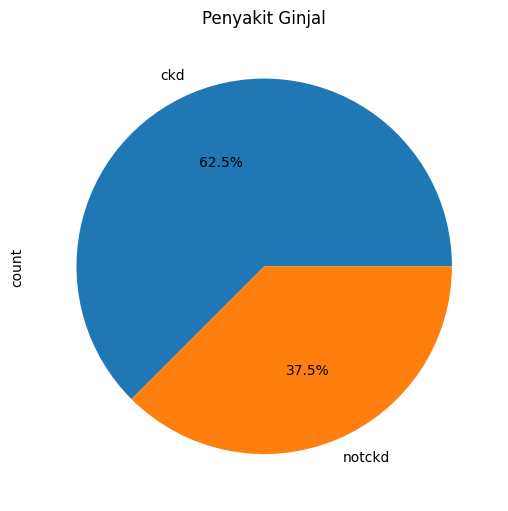

klasifikasi
ckd       250
notckd    150
Name: count, dtype: int64

In [31]:
# Penyakit Ginjal Kronis
fig, ax = plt.subplots(figsize=(7, 5), layout="constrained")
df["klasifikasi"].value_counts().plot.pie(autopct="%.1f%%", ax=ax)
ax.set_title("Penyakit Ginjal")
plt.show()

df["klasifikasi"].value_counts()

- Data berhasil diperbaiki.
- Terlihat bahwa banyaknya seseorang yang terkena penyakit ginjal kronis atau chronic kidney desease (ckd) yaitu sebesar 62.5% dari data dibanding seseorang yang tidak terkena penyakit ginjal kronis yaitu 37.5% dari data.

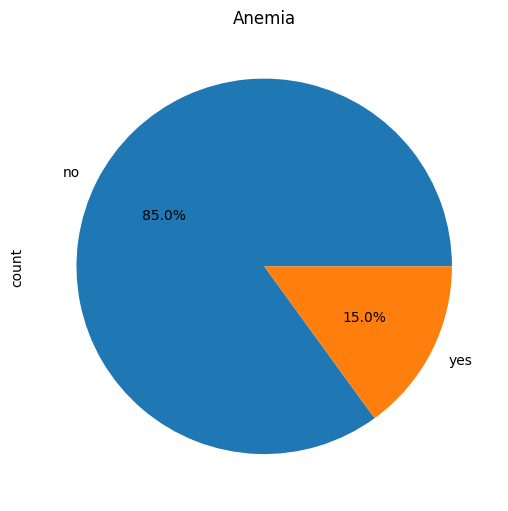

anemia
no     340
yes     60
Name: count, dtype: int64

In [32]:
# anemia
fig, ax = plt.subplots(figsize=(7, 5), layout="constrained")
df["anemia"].value_counts().plot.pie(autopct="%.1f%%", ax=ax)
ax.set_title("Anemia")
plt.show()

df["anemia"].value_counts()

- Terlihat banyaknya seseorang yang tidak terkena anemia yaitu 85.0% dari data dibanding seseorang yang terkena anemia yaitu hanya 15.0% dari data

C:\Users\danim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


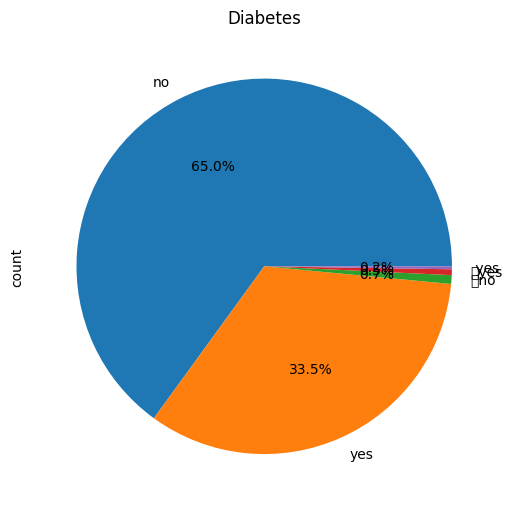

diabetes
no       260
yes      134
\tno       3
\tyes      2
 yes       1
Name: count, dtype: int64

In [33]:
# Diabetes
fig, ax = plt.subplots(figsize=(7, 5), layout="constrained")
df["diabetes"].value_counts().plot.pie(autopct="%.1f%%", ax=ax)
ax.set_title("Diabetes")
plt.show()

df["diabetes"].value_counts()

- Terdapat beberapa data inkonsistensi atau kesalahan input pada data sehingga perlu diperbaiki sebelum dianalisis lebih lanjut


In [34]:
df["diabetes"].replace("\tno", "no", inplace=True)
df["diabetes"].replace("\tyes", "yes", inplace=True)
df["diabetes"].replace(" yes", "yes", inplace=True)
df["diabetes"].value_counts()

C:\Users\danim\AppData\Local\Temp\ipykernel_2080\4032484212.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["diabetes"].replace("\tno", "no", inplace=True)
C:\Users\danim\AppData\Local\Temp\ipykernel_2080\4032484212.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["diabetes"].replace("\tno", "no", inpla

diabetes
no     263
yes    137
Name: count, dtype: int64

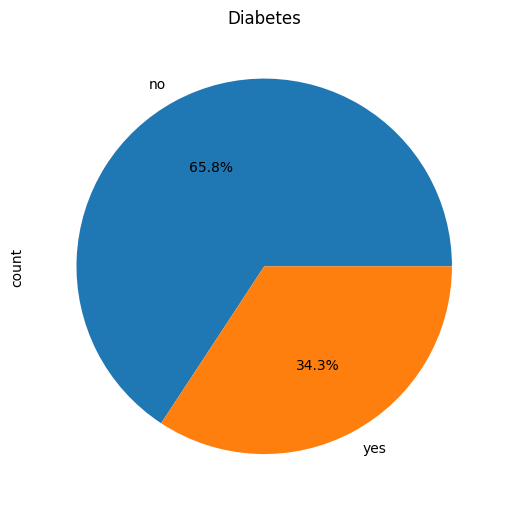

diabetes
no     263
yes    137
Name: count, dtype: int64

In [35]:
# Diabetes
fig, ax = plt.subplots(figsize=(7, 5), layout="constrained")
df["diabetes"].value_counts().plot.pie(autopct="%.1f%%", ax=ax)
ax.set_title("Diabetes")
plt.show()

df["diabetes"].value_counts()

- Terlihat bahwa seseorang yang memiliki diabetes lebih sedikit yaitu 34.3% dibanding seseorang yang tidak memiliki diabetes


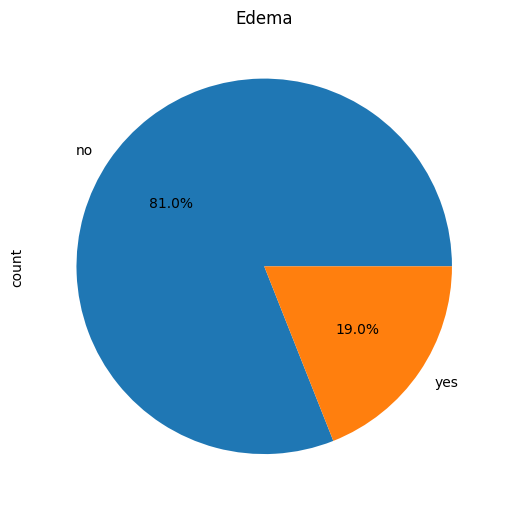

edema
no     324
yes     76
Name: count, dtype: int64

In [36]:
# Edema
fig, ax = plt.subplots(figsize=(7, 5), layout="constrained")
df["edema"].value_counts().plot.pie(autopct="%.1f%%", ax=ax)
ax.set_title("Edema")
plt.show()

df["edema"].value_counts()

- Terlihat bahwa seseorang yang terkena edema lebih sedikit yaitu 19.0% dari data dibanding seseorang yang tidak terkena edema yaitu 81.0% dari data
- Edema dapat memiliki hubungan yang kuat dengan penyakit ginjal karna edema dapat terjadi akibat penyakit ginjal.
- Dengan sedikitnya seseorang yang terkena edema mengindikasikan bahwa variabel ini tidak begitu kuat hubungannya dengan penyakit ginjal sehingga kita mungkin tidak akan memerlukan variabel ini.

In [37]:
df.drop("edema", axis=1, inplace=True)

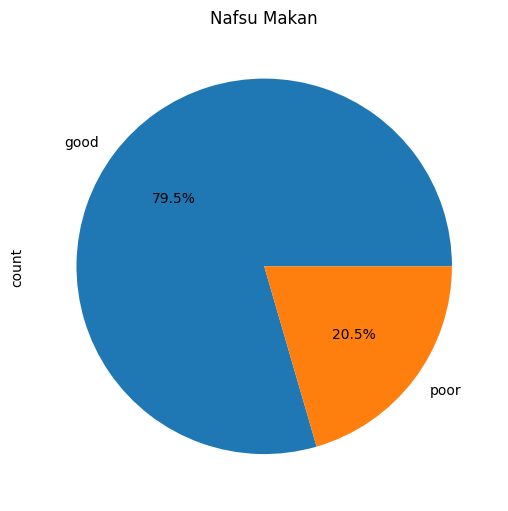

nafsumakan
good    318
poor     82
Name: count, dtype: int64

In [38]:
# Nafsu Makan
fig, ax = plt.subplots(figsize=(7, 5), layout="constrained")
df["nafsumakan"].value_counts().plot.pie(autopct="%.1f%%", ax=ax)
ax.set_title("Nafsu Makan")
plt.show()

df["nafsumakan"].value_counts()

- Terlihat bahwa kebanyakan seseorang memiliki nafsu makan yang baik dibanding seseorang yang memiliki nafsu makan yang buruk.
- Pada variabel ini mengindikasikan bahwa variabel ini tidak akan begitu berpengaruh terhadap klasifikasi karna data klasifikasi menunjukkan bahwa seseorang yang terkena penyakit ginjal lebih banyak sehingga banyaknya nafsu makan yang baik tidak akan berpengaruh terhadap serangan penyakit ginjal kronis atau chronis kidney desease.

In [39]:
df.drop("nafsumakan", axis=1, inplace=True)

C:\Users\danim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


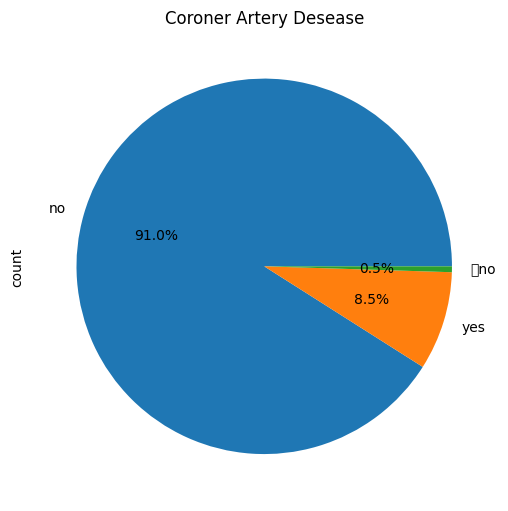

cad
no      364
yes      34
\tno      2
Name: count, dtype: int64

In [40]:
# Cad atau penyakit arteri koroner
fig, ax = plt.subplots(figsize=(7, 5), layout="constrained")
df["cad"].value_counts().plot.pie(autopct="%.1f%%", ax=ax)
ax.set_title("Coroner Artery Desease")
plt.show()

df["cad"].value_counts()

- Terdapat beberapa kesalahan input data sehingga perlu kita perbaiki terlebih dahulu

C:\Users\danim\AppData\Local\Temp\ipykernel_2080\3368588099.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["cad"].replace("\tno", "no", inplace=True)
C:\Users\danim\AppData\Local\Temp\ipykernel_2080\3368588099.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["cad"].replace("\tno", "no", inplace=True)


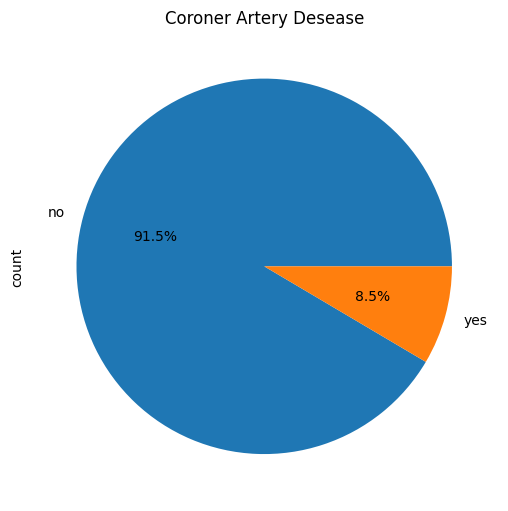

cad
no     366
yes     34
Name: count, dtype: int64

In [41]:
# Cad atau penyakit arteri koroner
df["cad"].replace("\tno", "no", inplace=True)

fig, ax = plt.subplots(figsize=(7, 5), layout="constrained")
df["cad"].value_counts().plot.pie(autopct="%.1f%%", ax=ax)
ax.set_title("Coroner Artery Desease")
plt.show()

df["cad"].value_counts()

- Terlihat bahwa seseorang yang terkena penyakit arteri koroner lebih sedikit yaitu 8.5% dibanding seseorang yang tidak terkena penyakit arteri koroner.
- Penyakit arteri koroner merupakan salah satu faktor yang diakibatkan oleh penyakit ginjal. Namun, dalam kasus ini, seseorang yang terkena penyakit koroner hanya sedikit sehingga variabel ini tidak begitu berpengaruh terhadap penyakit ginjal. Dengan begitu, peneliti akan menghapus variabel ini.

In [42]:
df.drop("cad", axis=1, inplace=True)

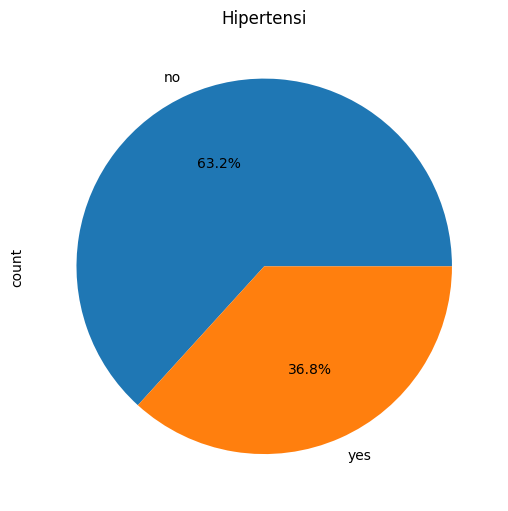

hipertensi
no     253
yes    147
Name: count, dtype: int64

In [43]:
# Hipertensi
fig, ax = plt.subplots(figsize=(7, 5), layout="constrained")
df["hipertensi"].value_counts().plot.pie(autopct="%.1f%%", ax=ax)
ax.set_title("Hipertensi")
plt.show()

df["hipertensi"].value_counts()

- Terdapat hanya sedikit seseorang yang terkena hipertensi yaitu sekitar 36.8% dibanding seseorang yang memiliki hipertensi yaitu 63.2%
- Hipertensi dapat disebabkan oleh diabetes dan penyakit ginjal. Setelah melakukan analisis diabetes sebelumnya, data diabetes juga menunjukkan hanya sedikit yang terkena diabetes. Dengan begitu, kita akan menghapus 2 variabel ini karna 2 variabel ini tidak begitu berpengaruh terhadap banyaknya yang terkena penyakit ginjal kronis sehingga hanya akan memperburuk kinerja metode ini dan melakukan kesalahan dalam prediksi.

In [44]:
df.drop(["hipertensi", "diabetes"], axis=1, inplace=True)

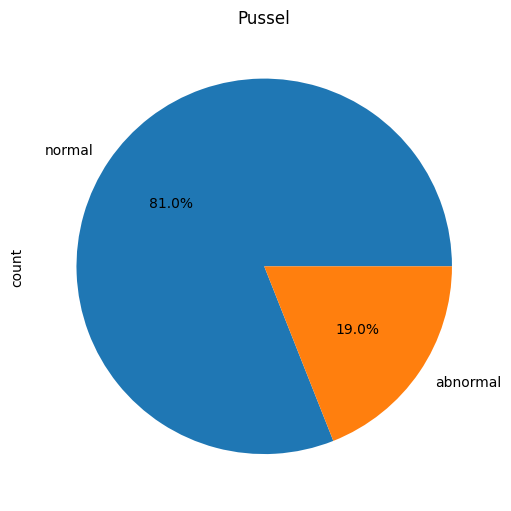

pussel
normal      324
abnormal     76
Name: count, dtype: int64

In [45]:
# pussel
fig, ax = plt.subplots(figsize=(7, 5), layout="constrained")
df["pussel"].value_counts().plot.pie(autopct="%.1f%%", ax=ax)
ax.set_title("Pussel")
plt.show()

df["pussel"].value_counts()

- Terdapat bahwa kebanyakan orang memiliki pussel yang normal yaitu sebesar 81.0% dibanding abnormal yaitu sebesar 19.0%
- Melihat banyaknya yang normal, hal ini mengindikasikan bahwa variabel ini tidak akan dibutuhkan dalam membuat pembuatan metode karna hanya akan menghasilkan kesalahan dalam prediksi data baru.


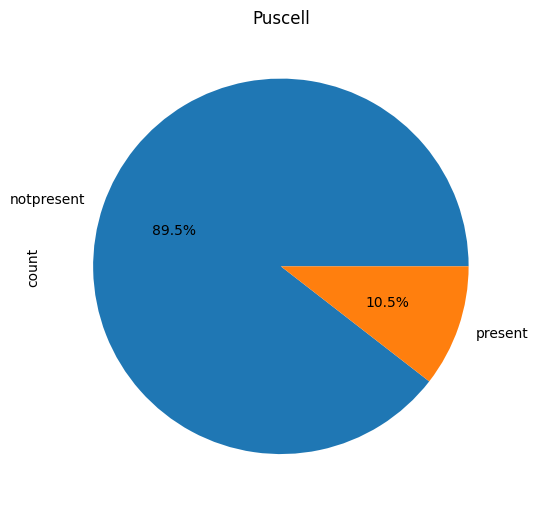

puscell
notpresent    358
present        42
Name: count, dtype: int64

In [46]:
# puscell
fig, ax = plt.subplots(figsize=(7, 5), layout="constrained")
df["puscell"].value_counts().plot.pie(autopct="%.1f%%", ax=ax)
ax.set_title("Puscell")
plt.show()

df["puscell"].value_counts()

- Terlihat banyaknya seseorang yang tidak memiliki puscell yaitu 89.5% dibanding seseorang yang memiliki hal tersebut yaitu sebesar 10.5%
- Variabel ini terlihat hampir mirip dengan variabel pussel sehingga variabel ini juga tidak akan begitu berpengaruh terhadap metode. Dengan demikian, peneliti juga akan menghapus variabel ini demi menghindari kesalahan dalam prediksi data baru jika seseorang terdeteksi normal

In [47]:
df.drop(["pussel", "puscell"], axis=1, inplace=True)
df.shape

(400, 17)

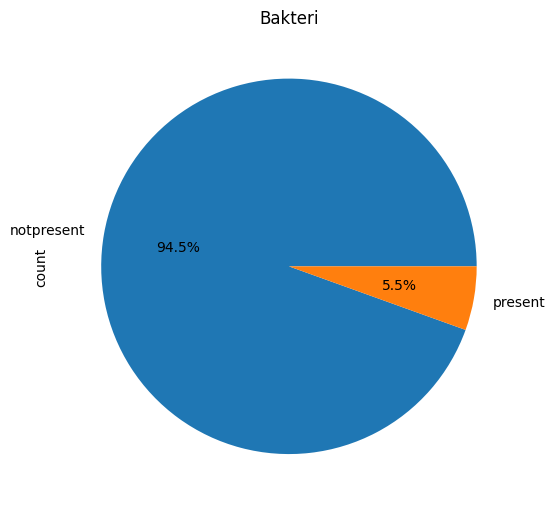

bakteri
notpresent    378
present        22
Name: count, dtype: int64

In [48]:
# bakteri
fig, ax = plt.subplots(figsize=(7, 5), layout="constrained")
df["bakteri"].value_counts().plot.pie(autopct="%.1f%%", ax=ax)
ax.set_title("Bakteri")
plt.show()

df["bakteri"].value_counts()

- Terlihat bahwa banyaknya seseorang yang tidak terdampak bakteri yaitu sebesar 94.5% dibanding orang yang terdampak bakteri yaitu sebesar 5.5%.
- Variabel ini juga akan dihapus karna hanya akan membuat model salah dalam melakukan sebuah prediksi pada data baru.

In [49]:
df.drop("bakteri", axis=1, inplace=True)
df.shape

(400, 16)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   umur             400 non-null    float64 
 1   tekanandarah     400 non-null    float64 
 2   gravitas         400 non-null    float64 
 3   albumin          400 non-null    float64 
 4   seldarahmerah    400 non-null    category
 5   gds              400 non-null    float64 
 6   ureum            400 non-null    float64 
 7   kreatinin        400 non-null    float64 
 8   natrium          400 non-null    float64 
 9   kalium           400 non-null    float64 
 10  hemoglobin       400 non-null    float64 
 11  MCV              400 non-null    float64 
 12  seldarahputih    400 non-null    float64 
 13  seldarahmerah.1  400 non-null    category
 14  anemia           400 non-null    category
 15  klasifikasi      400 non-null    category
dtypes: category(4), float64(12)
memory usage: 41

- Pada Sel darah merah, terlihat bahwa ada 2 variabel yang sama yaitu sel darah merah dan penulis tidak memerlukan 2 variabel yang sama sehingga penulis akan menghapusnya

In [51]:
df.drop("seldarahmerah.1", axis=1, inplace=True)


In [52]:
df.head()

,umur,tekanandarah,gravitas,albumin,seldarahmerah,gds,ureum,kreatinin,natrium,kalium,hemoglobin,MCV,seldarahputih,anemia,klasifikasi
0,48.0,80.0,1.020,1.0,normal,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,no,ckd
1,7.0,50.0,1.020,4.0,normal,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,no,ckd
2,62.0,80.0,1.010,2.0,normal,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,yes,ckd
3,48.0,70.0,1.005,4.0,normal,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,yes,ckd
4,51.0,80.0,1.010,2.0,normal,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,no,ckd


- Peneliti perlu memberbaiki tipe data sel darah putih dengan mengubahnya dari tipe data kategori menjadi tipe data numerik.
- Peneliti juga perlu memperbaiki tipe data MCV dengan mengubahnya dari tipe data kategori menjadi tipe data numerik

In [53]:
df["seldarahputih"].value_counts()

seldarahputih
8000.0     109
9800.0      11
6700.0      10
9200.0       9
7200.0       9
          ... 
12700.0      1
12200.0      1
13600.0      1
16300.0      1
10900.0      1
Name: count, Length: 89, dtype: int64

- Terdapat kesalahan input pada data sehingga peneliti perlu memperbaikinya

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   umur           400 non-null    float64 
 1   tekanandarah   400 non-null    float64 
 2   gravitas       400 non-null    float64 
 3   albumin        400 non-null    float64 
 4   seldarahmerah  400 non-null    category
 5   gds            400 non-null    float64 
 6   ureum          400 non-null    float64 
 7   kreatinin      400 non-null    float64 
 8   natrium        400 non-null    float64 
 9   kalium         400 non-null    float64 
 10  hemoglobin     400 non-null    float64 
 11  MCV            400 non-null    float64 
 12  seldarahputih  400 non-null    float64 
 13  anemia         400 non-null    category
 14  klasifikasi    400 non-null    category
dtypes: category(3), float64(12)
memory usage: 39.2 KB


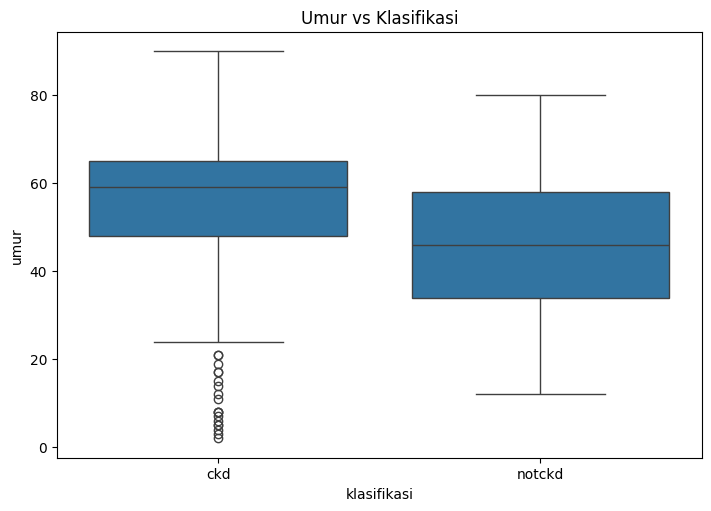

In [55]:
# Analisis umur vs penyakit ginjal kronis
fig, ax = plt.subplots(figsize=(7, 5), layout="constrained")
sns.boxplot(data=df, y="umur", x="klasifikasi")
ax.set_title("Umur vs Klasifikasi")
plt.show()

- Kebanyakan penyakit ginjal kronis dapat menyerang seseorang dengan umur diatas 20 tahun.
- Seseorang yang memiliki umur dibawah 20 tahun cenderung jarang terkena penyakit ginjal kronis
- Seseorang yang memiliki umur ditas 80 tahun cenderung rentan terhadap penyakit ginjal kronis
- Pada kasus ini, peneliti akan menghapus outliers agar data lebih stabil dan pembuatan model menjadi lebih akurat

In [56]:
df = detect_outliers(df, "umur")
df.shape

(400, 15)

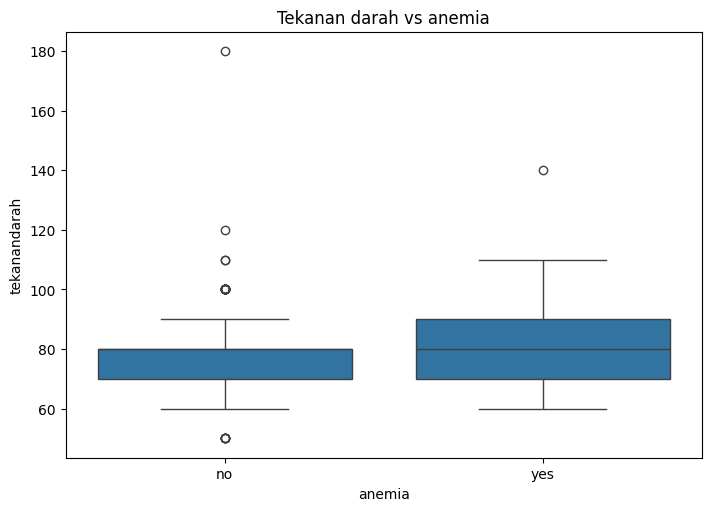

In [57]:
# Tekanan darah vs anemia
fig, ax = plt.subplots(figsize=(7, 5), layout="constrained")
sns.boxplot(data=df, y="tekanandarah", x="anemia")
ax.set_title("Tekanan darah vs anemia")
plt.show()

- Terlihat bahwa seseorang yang terkena anemia cenderung memiliki tekanan darah yang sedikit lebih tinggi dibanding seseorang yang tidak memiliki anemia

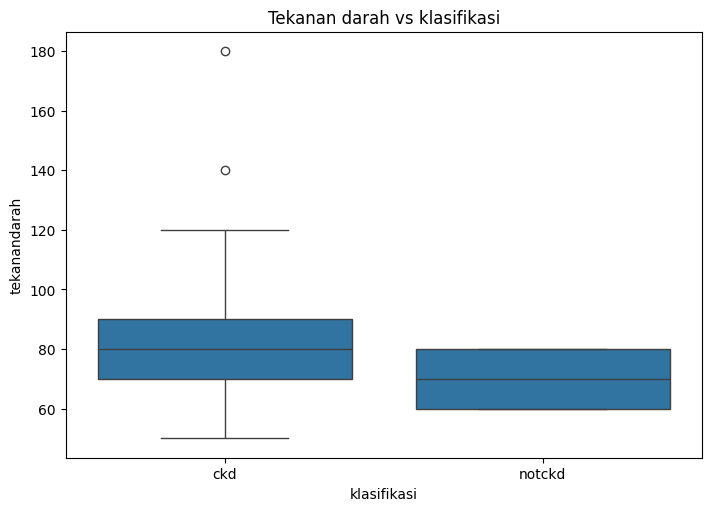

In [58]:
# Tekanan darah vs klasifikasi
fig, ax = plt.subplots(figsize=(7, 5), layout="constrained")
sns.boxplot(data=df, y="tekanandarah", x="klasifikasi")
ax.set_title("Tekanan darah vs klasifikasi")
plt.show()

- Terlihat bahwa seseorang yang terkena penyakit ginjal cenderung memiliki tekanan darah yang tinggi dibanding seseorang yang tidak terkena penyakit ginjal

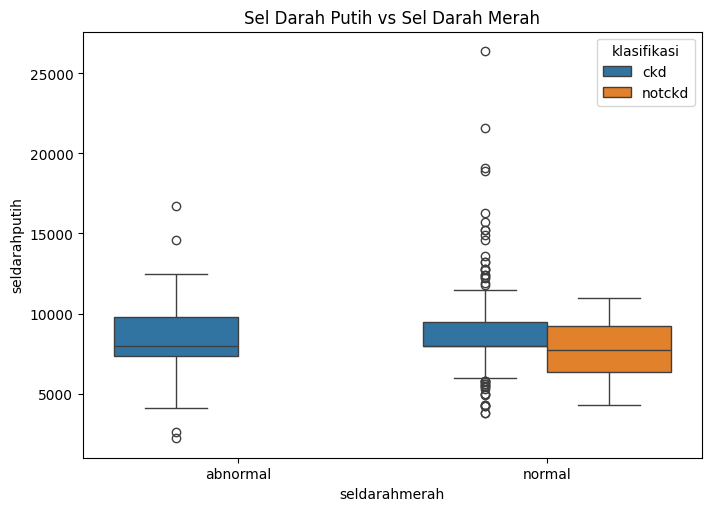

In [59]:
# seldarahmerah vs seldarahputih vs klasifikasi
fig, ax = plt.subplots(figsize=(7, 5), layout="constrained")
sns.boxplot(data=df, y="seldarahputih", x="seldarahmerah", hue="klasifikasi")
ax.set_title("Sel Darah Putih vs Sel Darah Merah")
plt.show()

- Terlihat bahwa seseorang yang terkena penyakit ginjal kronis cenderung memiliki sel darah merah yang abnormal dan sel darah putih yang cenderung lebih tinggi.
- Peneliti akan memilih untuk melakukan transformasi data pada data ini untuk mengatasi outlier atau nilai pencilan dibanding menghapusnya
- Untuk mengatasi banyaknya variabel yang kurang berpengaruh terhadap model, maka peneliti akan menghapusnya dan memilih 5 variabel terbaik

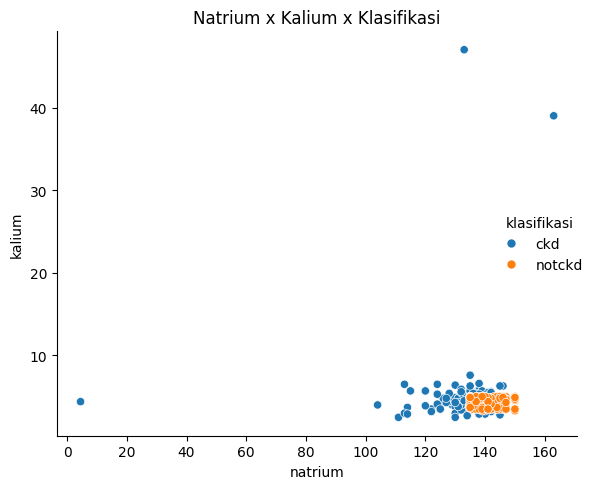

In [60]:
sns.relplot(data=df, x="natrium", y="kalium", hue="klasifikasi")
plt.title("Natrium x Kalium x Klasifikasi")
plt.tight_layout()
plt.show()

- Secara umum, orang yang terkena penyakit ginjal diduga memiliki kadar kalium dan natrium yang tinggi. Namun, dalam data ini, orang yang memiliki kalium rendah banyak yang terkena penyakit ginjal kronis
- Kita akan mengecek hubungan variabel ini dengan variabel lain

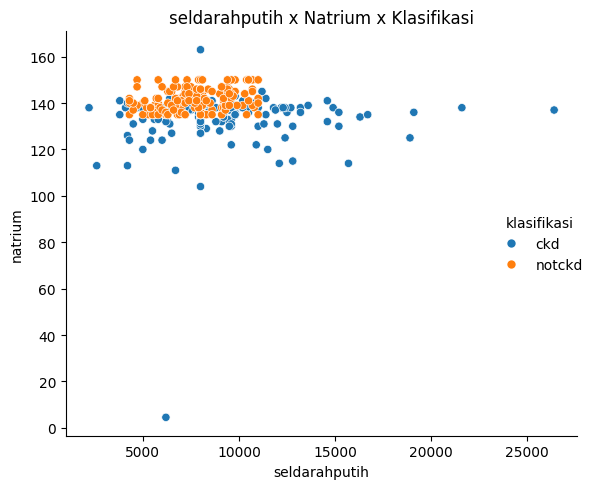

In [61]:
sns.relplot(data=df, x="seldarahputih", y="natrium", hue="klasifikasi")
plt.title("seldarahputih x Natrium x Klasifikasi")
plt.tight_layout()
plt.show()

- Sel darah putih memiliki pengaruh yang tinggi terhadap penyakit ginjal kronis.
- Semakin rendah sel darah putih, semakin tinggi peluang terkena penyakit ginjal kronis.

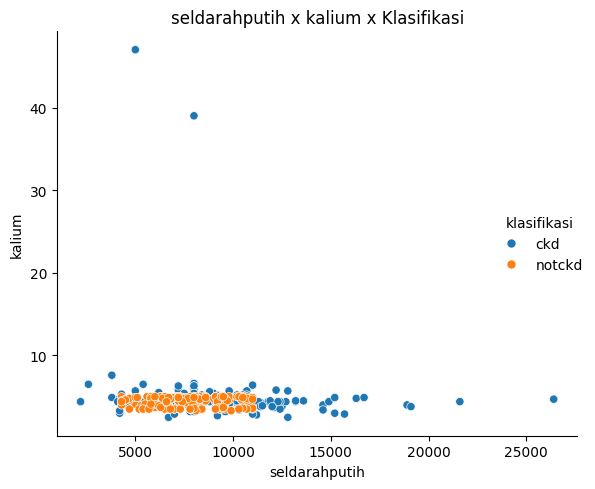

In [62]:
sns.relplot(data=df, x="seldarahputih", y="kalium", hue="klasifikasi")
plt.title("seldarahputih x kalium x Klasifikasi")
plt.tight_layout()
plt.show()

- Kalium memiliki korelasi yang sangat rendah terhadap data lain sehingga akan mempersulit kinerja model untuk mengklasifikasi penyakit ginjal kronis
- Peneliti akan menghapus variabel ini

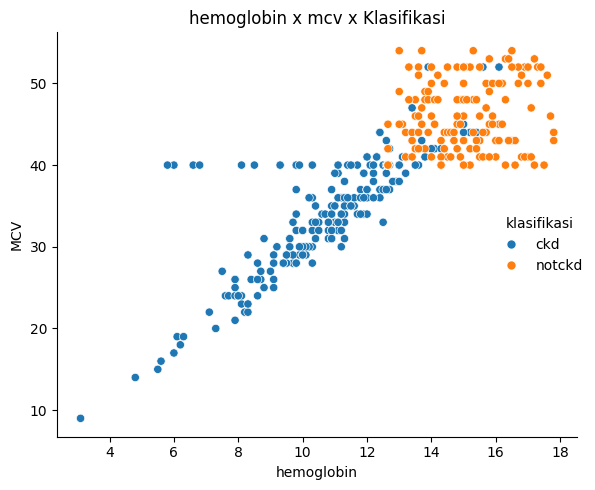

In [63]:
sns.relplot(data=df, x="hemoglobin", y="MCV", hue="klasifikasi")
plt.title("hemoglobin x mcv x Klasifikasi")
plt.tight_layout()
plt.show()

- Variabel hemoglobin memiliki korelasi yang sangat tinggi terhadap mcv terlihat pada grafik diatas.
- Secara umum, peningkatan kadar Hb dikaitkan dengan peningkatan ukuran sel darah merah (MCV). Hal ini karena ketika tubuh memproduksi lebih banyak Hb, sel darah merah juga cenderung membesar untuk menampung protein tambahan.
- Hubungan korelasi antar data hemoglobin dan MCV sangat tinggi yang dapat berakibat buruk terhadap kinerja model atau bias pada prediksi data baru.
- Dengan begitu, peneliti tidak memerlukan 2 variabel yang hampir sama sehingga peneliti akan menghapus salah satu variabel ini.

In [64]:
df.drop(["kalium", "MCV"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   umur           400 non-null    float64 
 1   tekanandarah   400 non-null    float64 
 2   gravitas       400 non-null    float64 
 3   albumin        400 non-null    float64 
 4   seldarahmerah  400 non-null    category
 5   gds            400 non-null    float64 
 6   ureum          400 non-null    float64 
 7   kreatinin      400 non-null    float64 
 8   natrium        400 non-null    float64 
 9   hemoglobin     400 non-null    float64 
 10  seldarahputih  400 non-null    float64 
 11  anemia         400 non-null    category
 12  klasifikasi    400 non-null    category
dtypes: category(3), float64(10)
memory usage: 32.9 KB


In [65]:
from sklearn.preprocessing import OrdinalEncoder, RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split

X = df.drop("klasifikasi", axis=1)
y = df["klasifikasi"].map({"ckd": 0, "notckd": 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 12), (80, 12), (320,), (80,))

In [66]:
labels = {i: LabelEncoder().fit(X_train[i]) for i in X_train.columns if X_train[i].dtypes == "category"}
names = [i for i in X_train.columns if X_train[i].dtypes != "category"]

for i in labels:
    X_train[i] = labels[i].transform(X_train[i])
    X_test[i] = labels[i].transform(X_test[i])
    
scaler = RobustScaler().fit(X_train[names])
X_train[names] = scaler.transform(X_train[names])
X_test[names] = scaler.transform(X_test[names])
X_train_ = X_train.copy()
X_train_["klasifikasi"] = y
X_train_.head()


,umur,tekanandarah,gravitas,albumin,seldarahmerah,gds,ureum,kreatinin,natrium,hemoglobin,seldarahputih,anemia,klasifikasi
3,-0.282609,-1.0,-3.0,2.0,1,-0.071111,0.478632,1.538462,-5.142857,-0.381579,-0.52,1,0
18,0.239130,2.0,1.0,0.0,1,2.524444,-0.512821,0.000000,-0.571429,0.013158,1.36,0,0
202,1.021739,-2.0,0.0,0.0,1,-0.124444,1.094017,0.984615,-0.571429,-1.223684,0.00,1,0
250,-0.630435,0.0,1.0,0.0,1,0.337778,-1.094017,-0.061538,-0.571429,0.618421,0.96,0,1
274,-1.543478,0.0,0.0,0.0,1,-0.248889,-0.649573,-0.369231,0.571429,0.460526,0.00,0,1


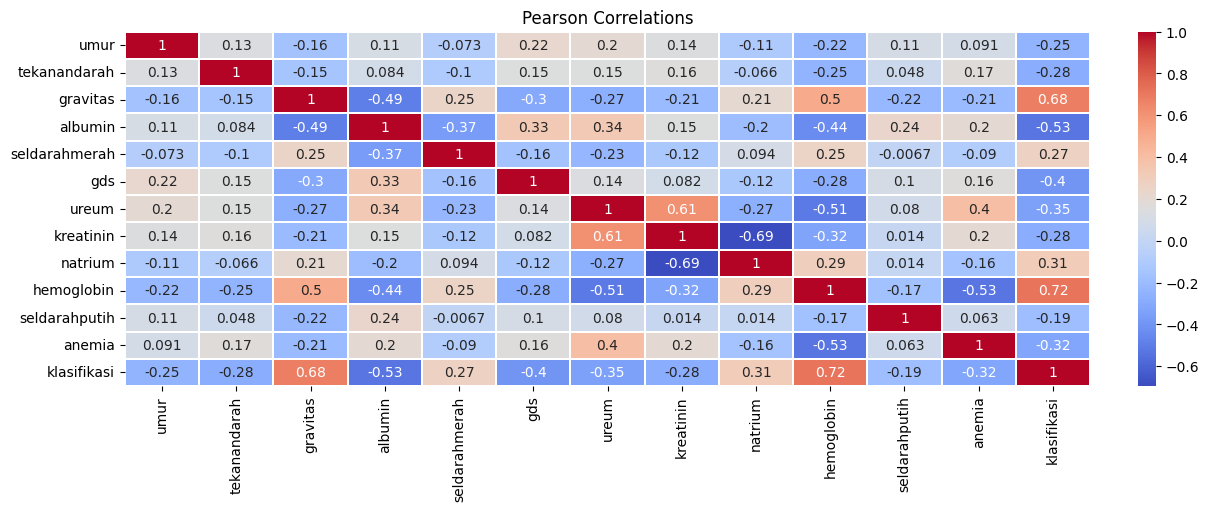

In [67]:
corr = X_train_.corr()
fig, ax = plt.subplots(figsize=(12, 5), layout="constrained")
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.2, linecolor="white", ax=ax)
ax.set_title("Pearson Correlations")
plt.show()

- Untuk mempercepat komputasi dan meningkatkan kinerja model, peneliti akan memakai 5 variabel saja yang memiliki korelasi tinggi terhadap data klasifikasi yaitu gravitas, albumin, hemoglobin, ureum, dan anemia.

In [68]:
X = df[["gravitas", "albumin", "hemoglobin", "ureum", "anemia"]]
y = df["klasifikasi"].map({"ckd": 0, "notckd": 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 5), (80, 5), (320,), (80,))

In [69]:
labels = {i: LabelEncoder().fit(X_train[i]) for i in X_train.columns if X_train[i].dtypes == "category"}
names = [i for i in X_train.columns if X_train[i].dtypes != "category"]

for i in labels:
    X_train[i] = labels[i].transform(X_train[i])
    X_test[i] = labels[i].transform(X_test[i])
    
scaler = RobustScaler().fit(X_train[names])
X_train[names] = scaler.transform(X_train[names])
X_test[names] = scaler.transform(X_test[names])
X_train_ = X_train.copy()
X_train_["klasifikasi"] = y
X_train_.head()


,gravitas,albumin,hemoglobin,ureum,anemia,klasifikasi
3,-3.0,2.0,-0.381579,0.478632,1,0
18,1.0,0.0,0.013158,-0.512821,0,0
202,0.0,0.0,-1.223684,1.094017,1,0
250,1.0,0.0,0.618421,-1.094017,0,1
274,0.0,0.0,0.460526,-0.649573,0,1


In [70]:
X_train_.to_excel("Hasil_preprocessing_data.xlsx")

In [71]:
df[X_train_.columns].head()

,gravitas,albumin,hemoglobin,ureum,anemia,klasifikasi
0,1.020,1.0,15.4,36.0,no,ckd
1,1.020,4.0,11.3,18.0,no,ckd
2,1.010,2.0,9.6,53.0,yes,ckd
3,1.005,4.0,11.2,56.0,yes,ckd
4,1.010,2.0,11.6,26.0,no,ckd


In [72]:
df[X_train_.columns].to_csv("ginjal.csv")
df[X_train_.columns].to_excel("ginjal.xlsx")


In [73]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

nb = BernoulliNB()
nb.fit(X_train, y_train)

BernoulliNB()

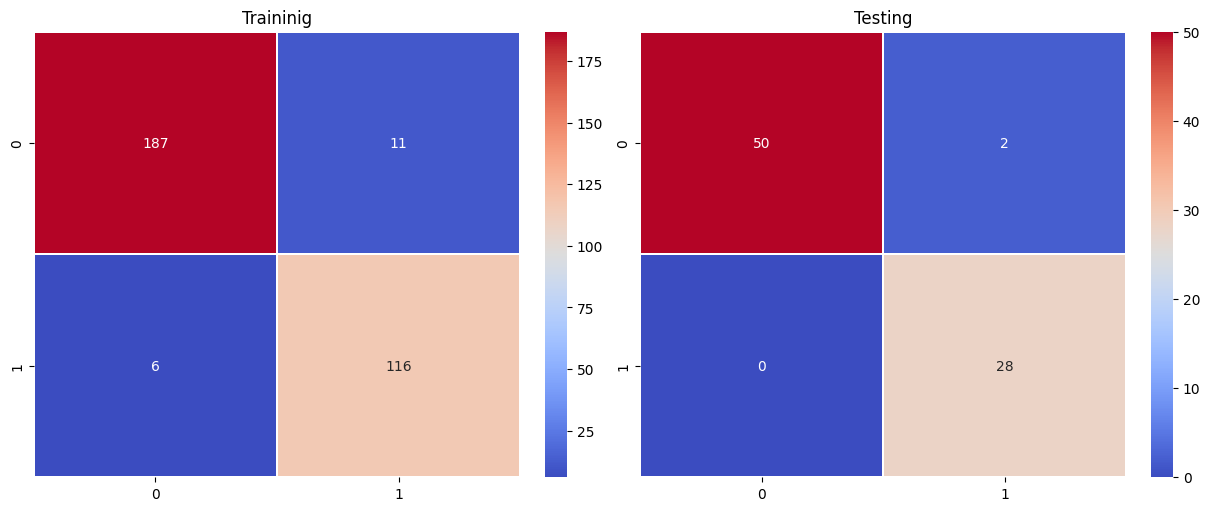

In [74]:
y_pred = nb.predict(X_test)
fig, ax = plt.subplots(1, 2, figsize=(12, 5), layout="constrained")
sns.heatmap(confusion_matrix(y_train, nb.predict(X_train)), annot=True, fmt="d", cmap="coolwarm", linewidths=0.2, linecolor="white", ax=ax[0])
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="coolwarm", linewidths=0.2, linecolor="white", ax=ax[1])

ax[0].set_title("Traininig")
ax[1].set_title("Testing")
plt.show()

In [75]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        52
           1       0.93      1.00      0.97        28

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



In [76]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f""""
Akurasi  : {accuracy*100:.2f}%
Presisi  : {precision*100:.2f}%
Recall   : {recall*100:.2f}%
F1 Score : {f1*100:.2f}%
      """)

"
Akurasi  : 97.50%
Presisi  : 93.33%
Recall   : 100.00%
F1 Score : 96.55%
      


In [77]:
names, X_train.columns

(['gravitas', 'albumin', 'hemoglobin', 'ureum'],
 Index(['gravitas', 'albumin', 'hemoglobin', 'ureum', 'anemia'], dtype='object'))

In [78]:
X_train.head()

,gravitas,albumin,hemoglobin,ureum,anemia
3,-3.0,2.0,-0.381579,0.478632,1
18,1.0,0.0,0.013158,-0.512821,0
202,0.0,0.0,-1.223684,1.094017,1
250,1.0,0.0,0.618421,-1.094017,0
274,0.0,0.0,0.460526,-0.649573,0


In [79]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

numeric_variables = names
categoric_variables = ["anemia"]

numeric_transformer = Pipeline(
    [
        ("impute", SimpleImputer(strategy="median")),
        ("scaler", RobustScaler())
    ]
)
categoric_transformer = Pipeline(
    [
        ("mode", SimpleImputer(strategy="most_frequent")),
        ("scaler", OrdinalEncoder())
    ]
)
preprocessing = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_variables),
        ("cat", categoric_transformer, categoric_variables)
    ]
)

In [80]:
models = Pipeline(
    [
        ("preprocessing", preprocessing),
        ("nb", nb)
    ]
)
models

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['gravitas', 'albumin',
                                                   'hemoglobin', 'ureum']),
                                                 ('cat',
                                                  Pipeline(steps=[('mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   OrdinalEncoder())]),
                                                  ['anemia'])])),
                ('nb', BernoulliNB())])

In [81]:
df_new = pd.read_csv("ginjal.csv")
df_new.head()

,Unnamed: 0,gravitas,albumin,hemoglobin,ureum,anemia,klasifikasi
0,0,1.020,1.0,15.4,36.0,no,ckd
1,1,1.020,4.0,11.3,18.0,no,ckd
2,2,1.010,2.0,9.6,53.0,yes,ckd
3,3,1.005,4.0,11.2,56.0,yes,ckd
4,4,1.010,2.0,11.6,26.0,no,ckd


In [82]:
df_new.drop(["Unnamed: 0"], axis=1, inplace=True)
df_new.head()

,gravitas,albumin,hemoglobin,ureum,anemia,klasifikasi
0,1.020,1.0,15.4,36.0,no,ckd
1,1.020,4.0,11.3,18.0,no,ckd
2,1.010,2.0,9.6,53.0,yes,ckd
3,1.005,4.0,11.2,56.0,yes,ckd
4,1.010,2.0,11.6,26.0,no,ckd


In [83]:
X = df_new.drop("klasifikasi", axis=1)
y = df_new["klasifikasi"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 5), (80, 5), (320,), (80,))

In [84]:
models[0].fit(X_train, y_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['gravitas', 'albumin', 'hemoglobin',
                                  'ureum']),
                                ('cat',
                                 Pipeline(steps=[('mode',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('scaler', OrdinalEncoder())]),
                                 ['anemia'])])

In [85]:
models.predict(X_test)

C:\Users\danim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [86]:
X_test

,gravitas,albumin,hemoglobin,ureum,anemia
209,1.020,0.0,11.5,42.0,no
280,1.020,0.0,13.3,33.0,no
33,1.020,2.0,10.1,55.0,no
210,1.015,4.0,7.3,132.0,yes
93,1.010,3.0,9.2,90.0,no
...,...,...,...,...,...
246,1.015,3.0,8.6,215.0,yes
227,1.015,0.0,11.3,48.0,no
369,1.020,0.0,13.6,48.0,no
176,1.010,4.0,8.3,40.0,yes


In [87]:
X_train

,gravitas,albumin,hemoglobin,ureum,anemia
3,1.005,4.0,11.2,56.0,yes
18,1.025,0.0,12.7,27.0,no
202,1.020,0.0,8.0,74.0,yes
250,1.025,0.0,15.0,10.0,no
274,1.020,0.0,14.4,23.0,no
...,...,...,...,...,...
71,1.010,1.0,9.8,92.0,no
106,1.020,0.0,6.0,118.0,yes
270,1.025,0.0,14.3,34.0,no
348,1.020,0.0,13.6,19.0,no


In [88]:
import joblib

joblib.dump(models, "models.joblib")

['models.joblib']

In [90]:
models.predict_proba(X_test.iloc[-1:, :])

C:\Users\danim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


array([[0.06492963, 0.93507037]])

In [92]:
models.predict(X_test.iloc[-1:, :]), y_test.iloc[-1]

C:\Users\danim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


(array([1], dtype=int64), 'notckd')

In [93]:
df_new[df_new["klasifikasi"] == "ckd"].shape[0], df_new[df_new["klasifikasi"] == "notckd"].shape[0], df_new.shape[0]

(250, 150, 400)

In [94]:
df_new.columns

Index(['gravitas', 'albumin', 'hemoglobin', 'ureum', 'anemia', 'klasifikasi'], dtype='object')

In [95]:
df_new["anemia"].value_counts()

anemia
no     340
yes     60
Name: count, dtype: int64

Probabilitas Kena Ginjal

kena anemia dan kena ginjal
- anemia = 60/400
- P(kena_ginjal) = 250/400
- P(posterior) = anemia / P(kena_ginjal)
- Prior_posterior = P(posterior) * P(kena_ginjal) / anemia

kena anemia dan gk kena ginjal
- anemia = 60/400
- P(gk_kena_ginjal) = 150/400
- P(posterior) = anemia / P(gk_kena_ginjal)
- Prior_posterior = P(posterior) * P(kena_ginjal) / anemia

gk kena anemia dan kena_ginjal
- gk_kena = 340/400
- P(kena_ginjal) = 250/400
- P(Posterior) = gk_kena / P(kena_ginjal)
- prior_posterior = P(posterior) * P(kena_ginjal) / gk_kena

gk kena anemia dan gk kena ginjal
- gk_kena = 340/400
- P(gk_kena_ginjal) = 150/400
- P(Posterior) = gk_kena / P(gk_kena_ginjal)
- prior_posterior = P(posterior) * P(kena_ginjal) / gk_kena
